In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


In [18]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = 15, sigma = 1.0, learning_rate = 0.25)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

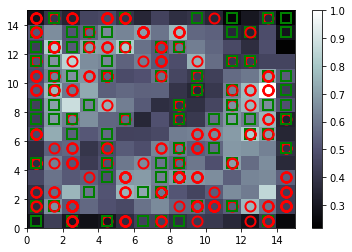

In [19]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [6]:

# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
pd_frauds = pd.DataFrame(frauds)
pd_frauds.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15785339.0,1.0,35.25,3.165,2.0,14.0,8.0,3.750,1.0,0.0,0.0,1.0,2.0,680.0,1.0
1,15678210.0,1.0,42.17,5.040,2.0,11.0,8.0,12.750,1.0,0.0,0.0,1.0,2.0,92.0,1.0
2,15664615.0,1.0,33.17,1.040,2.0,12.0,8.0,6.500,1.0,0.0,0.0,1.0,2.0,164.0,31286.0
3,15607986.0,1.0,40.92,2.250,1.0,14.0,8.0,10.000,1.0,0.0,0.0,1.0,2.0,176.0,1.0
4,15716276.0,1.0,34.25,3.000,2.0,13.0,8.0,7.415,1.0,0.0,0.0,1.0,2.0,0.0,1.0
5,15578722.0,1.0,19.42,1.500,1.0,13.0,4.0,2.000,1.0,0.0,0.0,1.0,2.0,100.0,21.0
6,15762392.0,1.0,36.67,3.250,2.0,11.0,8.0,9.000,1.0,0.0,0.0,1.0,2.0,102.0,640.0
7,15591107.0,1.0,32.00,1.750,1.0,10.0,8.0,0.040,1.0,0.0,0.0,1.0,2.0,393.0,1.0
8,15699294.0,1.0,24.42,12.335,2.0,11.0,8.0,1.585,1.0,0.0,0.0,1.0,2.0,120.0,1.0
9,15583680.0,1.0,23.08,11.500,2.0,9.0,8.0,2.125,1.0,1.0,11.0,1.0,2.0,290.0,285.0
